In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns

In [89]:
mail_data=pd.read_csv('mail_data.csv')

In [90]:
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [91]:
mail_data.shape

(5572, 2)

In [92]:
mail_data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


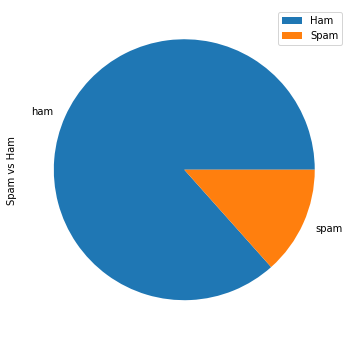

In [93]:
mail_data.Category.value_counts().plot(kind = 'pie', figsize = (6,6))
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [94]:
mail_data.replace({'Category':{'spam':0,'ham':1}},inplace=True)

C:\Users\Raj\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Category', ylabel='count'>

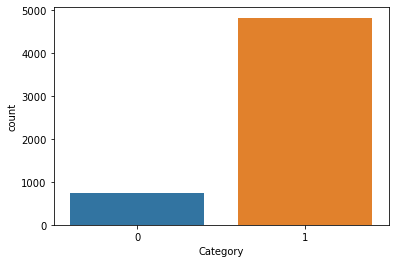

In [95]:
sns.countplot('Category',data=mail_data)

In [96]:
import re
import nltk
from nltk.corpus import stopwords
all_stopwords = stopwords.words('english')   # this is a list of all_stopwords
# print(all_stopwords)
from nltk.stem.porter import PorterStemmer
corpus=[]
for i in range(0,5572):
    review = re.sub('[^a-zA-Z0-9]', ' ', mail_data['Message'][i])  # The sub() function replaces the matches with the text of your choice
# for example if sentence is "raj is a good34..@@@ boy" then the sub will replace all the number and sign with spaces. 
# then output will be raj is a good34        boy" full of spaces . 
#     now converting the review in small character 
    review=review.lower()
#     now splitting the every word from a sentence a putting them is a list 
    review=review.split()
#     print(review)  this will give output as ['wow','loved','this','place']
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
#     print(review) this will remove the all stopwords from the sentence 
    review = ' '.join(review)
#     print(review)  the above line will join the list in sentence with all the stopwords removed .
    corpus.append(review)

In [97]:
# print(corpus)
mail_data['Message']=corpus
x=mail_data['Message']
y=mail_data['Category']
print(x.shape)
print(x)

(5572,)
0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u u 750 pound prize 2 c...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object


In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=3)
# print(x_train.shape)
# print(x_test.shape)

In [99]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
# print(X_train_features)
print(X_test_features)
# convert Y_train and Y_test values as integers

# Y_train = Y_train.astype('int')
# Y_test = Y_test.astype('int')

  (0, 5984)	0.20971550160734512
  (0, 4698)	0.22093555465286022
  (0, 4565)	0.20214311184190892
  (0, 3841)	0.18519877575272528
  (0, 1460)	0.2585752266509729
  (0, 1453)	0.12682736880249731
  (0, 1334)	0.3238629389562452
  (0, 1294)	0.2562107711016661
  (0, 1054)	0.24987227738071655
  (0, 1017)	0.2856090562808515
  (0, 404)	0.2427614500666094
  (0, 305)	0.24442134193024162
  (0, 20)	0.31264288591073003
  (0, 14)	0.27318886017603145
  (0, 9)	0.2908169904969809
  (0, 1)	0.2427614500666094
  (1, 6374)	0.31153123781160325
  (1, 5815)	0.4416819017428561
  (1, 5690)	0.2937896397734084
  (1, 5617)	0.2719006719090556
  (1, 5372)	0.3535369671090668
  (1, 4155)	0.23882116013149374
  (1, 3866)	0.35165636090830904
  (1, 3089)	0.49187084474594994
  (2, 6231)	0.22490921341614778
  :	:
  (1111, 2866)	0.4305196269337183
  (1111, 2177)	0.38847384606857416
  (1111, 886)	0.34073288007494573
  (1112, 6116)	0.30388989908506797
  (1112, 5852)	0.30589608197895446
  (1112, 5441)	0.2833125235511708
  (1112, 5

In [100]:
model = LogisticRegression()
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data : ', accuracy_on_training_data)
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on training data :  0.9694862014808167
Accuracy on test data :  0.9713004484304932


In [101]:
input_mail = ["U dun say so early h"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail
